## Installing Libraries

In [1]:
%%capture
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install joblib
!pip install seaborn
!pip install numpy
%%capture
## https://github.com/Worlddatascience/DataScienceCohort/blob/master/6_How_to_Create_a_Candlestick_Chart_using_Python.ipynb
!pip install cufflinks
## Code to Install Backtrader
!pip install backtrader 


## Importing necessary packages

In [2]:
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import cufflinks as cf   #A powerful data visualization library used for Financial Data Science processes
from plotly.offline import iplot, init_notebook_mode #Plotly and cufflinks work in conjunction

cf.go_offline() #gives ability to plot offline
init_notebook_mode() #gives ability to plot things proportionately in the notebook


In [3]:
import warnings
warnings.filterwarnings('ignore')

### Ticker of interest

In [29]:
name = "QQQ"
#def stock(name,start,end):
def bol_band_strategy(name="QQQ",window="1d",first="2019-11-4", last="2022-11-15",period=20,multiplier=1.7,investment_value = 100000):
    ticker = yfinance.Ticker(name)
    df = ticker.history(interval=window,start=first,end=last)
    df['MiddleBand']= df['Close'].rolling(period).mean()
    df['UpperBand'] = df['Close'].rolling(period).mean() + df['Close'].rolling(period).std() * multiplier
    df['LowerBand'] = df['Close'].rolling(period).mean() - df['Close'].rolling(period).std() * multiplier
    #return df
    #def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    #data=df['Close']
    #lower_bb=df['LowerBand']
    #upper_bb=df['UpperBand']
    
    for i in range(len(df['Close'])):
        if df['Close'][i-1] > df['LowerBand'][i-1] and df['Close'][i] < df['UpperBand'][i]:
            if signal != 1:
                buy_price.append(df['Close'][i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif df['Close'][i-1] < df['UpperBand'][i-1] and df['Close'][i] > df['UpperBand'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(df['Close'][i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
    df['buy_price']=buy_price
    df['sell_price']=sell_price
    df['bb_signal']=bb_signal 
        
    #return df
    position = []
    for i in range(len(df['bb_signal'])):
        if df['bb_signal'][i] > 1:
            position.append(0)
        else:
            position.append(1)
        
    for i in range(len(df['Close'])):
        if df['bb_signal'][i] == 1:
            position[i] = 1
        elif df['bb_signal'][i] == -1:
            df['bb_signal'][i] = 0
        else:
            position[i] = position[i-1]
    df['position']=position
    df_ret = pd.DataFrame(np.diff(df['Close'])).rename(columns = {0:'returns'})
    bb_strategy_ret = []

    for i in range(len(df_ret)):
        try:
            returns = df_ret['returns'][i]*df['position'][i]
            bb_strategy_ret.append(returns)
        except:
            pass
    
    bb_strategy_ret_df = pd.DataFrame(bb_strategy_ret).rename(columns = {0:'bb_returns'})

    #investment_value = 100000
    number_of_stocks = math.floor(investment_value/df['Close'][-1])
    bb_investment_ret = []

    for i in range(len(bb_strategy_ret_df['bb_returns'])):
        returns = number_of_stocks*bb_strategy_ret_df['bb_returns'][i]
        bb_investment_ret.append(returns)

    bb_investment_ret_df = pd.DataFrame(bb_investment_ret).rename(columns = {0:'investment_returns'})
    total_investment_ret = round(sum(bb_investment_ret_df['investment_returns']), 2)
    profit_percentage = round(((total_investment_ret/investment_value)*100),2)
    Profit_oneinvest=round(((df['Close'][-1]-df['Close'][0])/(df['Close'][0])*100),2)
    print('For total Investment in {}'.format(name),'of ${}'.format(investment_value))
    print('Profit gained from the BB strategy by investing in {}'.format(name),'is {}'.format(total_investment_ret))
    print('Profit percentage of the BB strategy : {}%'.format(profit_percentage))
    print('Total profit by just investing one time in{}'.format(name),'is{}%'.format(Profit_oneinvest))

    plt.rcParams['figure.figsize'] = [12,12]
    plt.rc('font', size=14)
    df['Close'].plot(label = 'CLOSE PRICES', alpha = 0.4)
    df['UpperBand'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
    df['MiddleBand'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
    df['LowerBand'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
    plt.scatter(df.index,df['buy_price'], marker = '^', color = 'green', label = 'BUY', s = 50)
    plt.scatter(df.index,df['sell_price'], marker = 'v', color = 'red', label = 'SELL', s = 50)
    plt.title(name)
    plt.legend(loc = 'upper right')
    plt.show()
    plt.rcParams['figure.figsize'] = [16,16]
    plt.rc('font', size=14)
    Candlestick= cf.QuantFig(df, title=name, legend='top', name=name)
    Candlestick.add_volume() 
    Candlestick.add_rsi(periods=14, color='green') 
    Candlestick.iplot()
    #Candlestick.add_rsi(periods=14, color='green') 
    #Candlestick.add_macd()
    #Candlestick.add_dmi()
    #Candlestick.iplot()
    #Candlestick.add_sma(periods=20, column='Close', color='red')
    #Candlestick.add_ema(periods=20, color='grey')
    #Candlestick.iplot()
    
    
    

For total Investment in QQQ of $50000
Profit gained from the BB strategy by investing in QQQ is 41561.82
Profit percentage of the BB strategy : 83.12%
Total profit by just investing one time inQQQ is495.36%


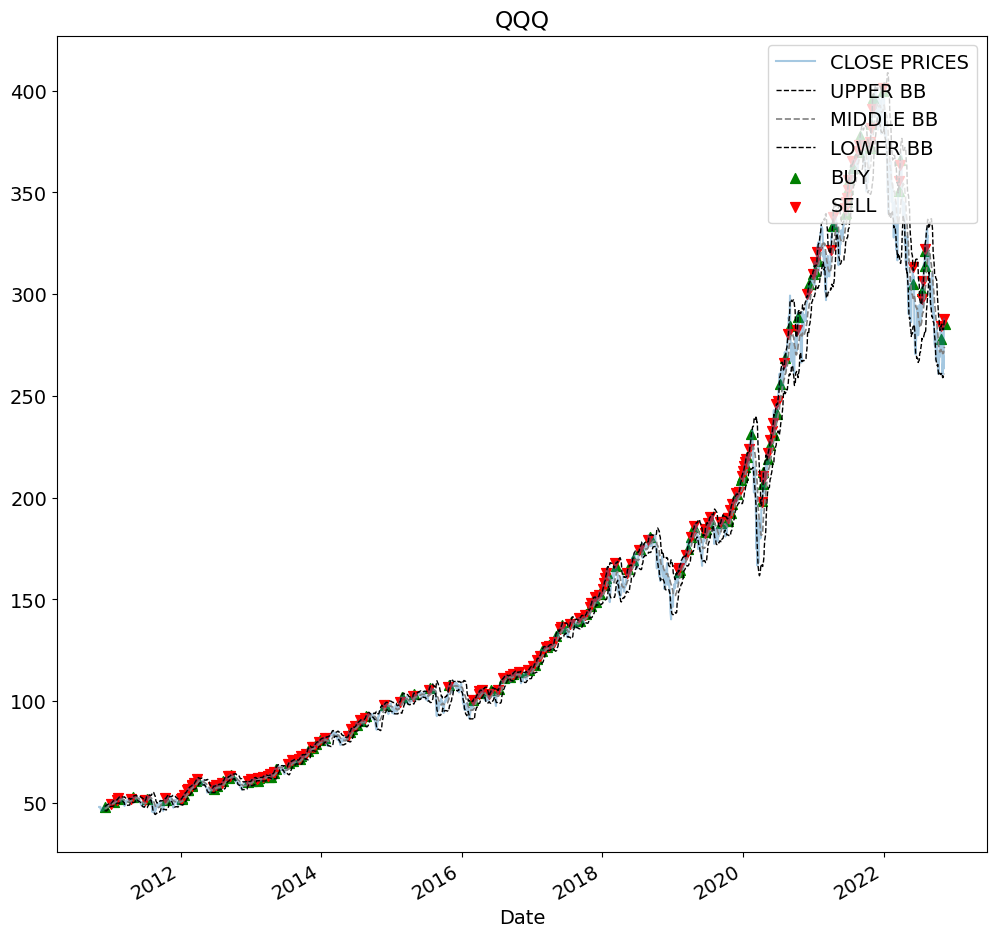

In [32]:
bol_band_strategy("QQQ","1d","2010-11-4","2022-11-15",investment_value = 50000)

In [ ]:
df.info()

In [ ]:
create_dataframe("SPY","1d","2019-11-4","2022-11-15")

## Checking Data 

In [ ]:
df.info()

In [ ]:
df.head()

## Defining period and multiplier for rolling calcualtions 

In [ ]:
period=20
multiplier=1.7

In [ ]:
df['MiddleBand']= df['Close'].rolling(period).mean()
df['UpperBand'] = df['Close'].rolling(period).mean() + df['Close'].rolling(period).std() * multiplier
df['LowerBand'] = df['Close'].rolling(period).mean() - df['Close'].rolling(period).std() * multiplier

## Plotting Bolinger Bnd

In [ ]:
#https://medium.com/codex/how-to-calculate-bollinger-bands-of-a-stock-with-python-f9f7d1184fc3
plt.rcParams['figure.figsize'] = [16, 10]

plt.rc('font', size=14)

plt.plot(df['Close'], label = ticker)
plt.plot(df['MiddleBand'], label = "Moving Average")
plt.plot(df['UpperBand'], label = "Upper Bollinger Band")
plt.plot(df['LowerBand'], label = "Lower Bollinger Band")

plt.legend()

plt.show()

## Implementing buy and sell strategy using bollinger bands

In [ ]:
##https://medium.com/codex/algorithmic-trading-with-bollinger-bands-in-python-1b0a00c9ef99
#https://medium.com/codex/algorithmic-trading-with-bollinger-bands-in-python-1b0a00c9ef99
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
        position = []
    for i in range(len(bb_signal)):
        if bb_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
    for i in range(len(df['Close'])):
        if bb_signal[i] == 1:
        position[i] = 1
    elif bb_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
    upper_bb = df['UpperBand']
    lower_bb = df['LowerBand']
    close_price = df['Close']
    bb_signal = pd.DataFrame(bb_signal).rename(columns = {0:'bb_signal'}).set_index(df.index)
    position = pd.DataFrame(position).rename(columns = {0:'bb_position'}).set_index(df.index)

    frames = [close_price, upper_bb, lower_bb, bb_signal, position]
    strategy = pd.concat(frames, join = 'inner', axis = 1)
    strategy = strategy.reset_index().drop('Date', axis = 1)

            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(df['Close'], df['LowerBand'], df['UpperBand'])


### Investment strategy

#### Creating a  position list to see if we already have the stock: 1 if we already own the stock 

In [ ]:
position = []
for i in range(len(bb_signal)):
    if bb_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(df['Close'])):
    if bb_signal[i] == 1:
        position[i] = 1
    elif bb_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
upper_bb = df['UpperBand']
lower_bb = df['LowerBand']
close_price = df['Close']
bb_signal = pd.DataFrame(bb_signal).rename(columns = {0:'bb_signal'}).set_index(df.index)
position = pd.DataFrame(position).rename(columns = {0:'bb_position'}).set_index(df.index)

frames = [close_price, upper_bb, lower_bb, bb_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)
strategy = strategy.reset_index().drop('Date', axis = 1)

strategy

### Plotting Buyback signals on bollinger bands

In [ ]:
plt.rcParams['figure.figsize'] = [24,24]
plt.rc('font', size=14)
df['Close'].plot(label = 'CLOSE PRICES', alpha = 0.4)
df['UpperBand'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
df['MiddleBand'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
df['LowerBand'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 50)
plt.scatter(df.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 50)
plt.title('QQQ BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper right')
plt.show()

__Back Testing to see how the trading strategy is working__

In [ ]:
import math
df_ret = pd.DataFrame(np.diff(df['Close'])).rename(columns = {0:'returns'})
bb_strategy_ret = []

for i in range(len(df_ret)):
    try:
        returns = df_ret['returns'][i]*strategy['bb_position'][i]
        bb_strategy_ret.append(returns)
    except:
        pass
    
bb_strategy_ret_df = pd.DataFrame(bb_strategy_ret).rename(columns = {0:'bb_returns'})

investment_value = 100000
number_of_stocks = math.floor(investment_value/df['Close'][-1])
bb_investment_ret = []

for i in range(len(bb_strategy_ret_df['bb_returns'])):
    returns = number_of_stocks*bb_strategy_ret_df['bb_returns'][i]
    bb_investment_ret.append(returns)

bb_investment_ret_df = pd.DataFrame(bb_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(bb_investment_ret_df['investment_returns']), 2)
profit_percentage = math.floor((total_investment_ret/investment_value)*100)
print('Profit gained from the BB strategy by investing $100k in df : {}'.format(total_investment_ret))
print('Profit percentage of the BB strategy : {}%'.format(profit_percentage))


### Using cufflinks for displaying bollingerband with candlestick

In [ ]:
%%capture
## https://github.com/Worlddatascience/DataScienceCohort/blob/master/6_How_to_Create_a_Candlestick_Chart_using_Python.ipynb
!pip install cufflinks
## Code to Install Backtrader
!pip install backtrader 
import cufflinks as cf   #A powerful data visualization library used for Financial Data Science processes
from plotly.offline import iplot, init_notebook_mode #Plotly and cufflinks work in conjunction

cf.go_offline() #gives ability to plot offline
init_notebook_mode() #gives ability to plot things proportionately in the notebook


In [ ]:
plt.rcParams['figure.figsize'] = [24,24]
plt.rc('font', size=14)
Candlestick= cf.QuantFig(df, title='QQQ', legend='top', name='QQQ')

In [ ]:
Candlestick.add_bollinger_bands(periods=20, boll_std=2, fill=True, column='Close')
Candlestick.add_volume() 
#Candlestick.add_dmi()#Adding parameters for a Volume chart (measure of shares and trading volume over a specified time)
#Candlestick.add_sma(periods=20, column='Close', color='red') #Simple Moving Average for a 20 day period 
#A 20-day moving average would average out the closing prices for the first 20 days as the first data point.
#Candlestick.add_ema(periods=20, color='green') #Exponential Moving Average for a 20 day period

In [ ]:
Candlestick.iplot()
